In [12]:
import matplotlib.pyplot as plt 
import os 
import pickle 


file = 'codegraphs/diversevul/positive_negative_files_approxdist.pkl'
data = pickle.load(open(file, 'rb'))

import torch 
file = 'codegraphs/diversevul/diversevul_graph_info.pkl'
data3 = pickle.load(open(file, 'rb'))

In [37]:
pairs = set()
pos_pairs = set()
neg_pairs = set()
for v in data[0]:
    pairs.add(v)
    pos_pairs.add(v)
for v in data[1]:
    pairs.add(v)
    neg_pairs.add(v)

len(pairs)


35486

In [13]:
data3

[{'hash': 73008646937836648589283922871188272089,
  'commit_id': '7ad6162573ba79a4392c63b453ad0220ca6c5ace',
  'project': 'gnutls',
  'target': 1,
  'cwe': [],
  'size': 157,
  'message': 'added an extra check while checking the padding.'},
 {'hash': 211824207069112513181516095447837228041,
  'commit_id': '055ecbc62878e86287d742c7246c21606cee8183',
  'project': 'php-src',
  'target': 1,
  'cwe': ['CWE-264'],
  'size': 22,
  'message': 'Improve check for :memory: pseudo-filename in SQlite'},
 {'hash': 21401706257394042943815500829552774160,
  'commit_id': '251fc70e9722f931eec23a34030d05ba5f747b0e',
  'project': 'busybox',
  'target': 1,
  'cwe': [],
  'size': 232,
  'message': 'uncompress: fix buffer underrun by corrupted input\n\nSigned-off-by: Denys Vlasenko <vda.linux@googlemail.com>'},
 {'hash': 135590882627853658533498335902319684573,
  'commit_id': 'b2eb849d4b1fdb6f35d5c46958c7f703cf64cfef',
  'project': 'qemu',
  'target': 1,
  'cwe': ['CWE-787'],
  'size': 66,
  'message': 'CVE-

In [24]:
all_files = set()
lengths = {}
for k in data3:
    f = k['commit_id']+'_'+str(k['hash'])+'_'+str(k['target'])+'.cpg.pt'
    all_files.add(f)
    lengths[f] = k['size']
    
    
non_pairs = all_files - pairs
len(non_pairs), len(all_files)

(295006, 330492)

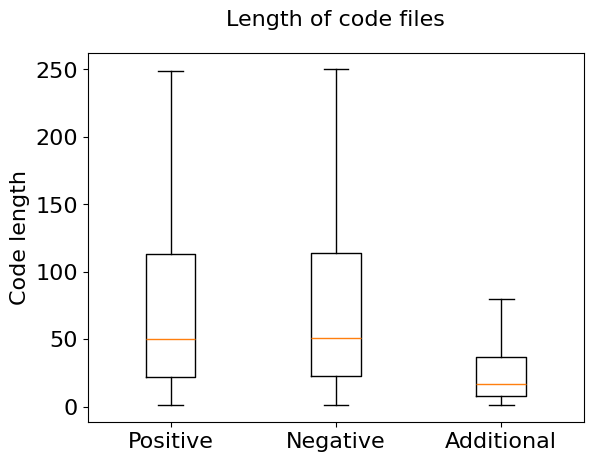

medians
18945
16541
Additional 35.17730147861399
Negative 112.02774922918807
Positive 114.70778569543415


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, f1_score
import numpy as np
import torch
import matplotlib
import matplotlib.pyplot as plt
from copy import deepcopy


font = {
         'size'   : 16}
matplotlib.rc('font', **font)
matplotlib.rc('axes', labelsize=16, titlesize=16)
# hist pairs and non pairs lengths
length_pairs = [lengths[f] for f in pairs]
length_non_pairs = [lengths[f] for f in non_pairs]

length_pos_pairs = [lengths[f] for f in pos_pairs]
length_neg_pairs = [lengths[f] for f in neg_pairs]

# boxplot of lengths, of no_pairs, pos pairs and neg pairs hide outliers
plt.boxplot([length_pos_pairs, length_neg_pairs, length_non_pairs, ], showfliers=False)
plt.xticks([1,2,3], ['Positive', 'Negative', 'Additional'])
plt.title('Length of code files',y = 1.05)

plt.ylabel('Code length')
# leg = plt.legend(loc='upper right', bbox_to_anchor=(1.76, 1), ncol=1)

# leg.get_frame().set_edgecolor('black')
# # # background white of legend white
# leg.get_frame().set_facecolor('white')
# # # set backgrond non-transparent
# leg.get_frame().set_alpha(1)
# set edge color 
# leg.get_frame().set_linewidth(0.0)
# set x lim
# plt.ylim(0, 0.3)

plt.savefig(f"confirmed.png", dpi=300, bbox_inches='tight')

plt.show()
# print medians
print('medians')
print(len(length_pos_pairs))
print(len(length_neg_pairs))
print('Additional', sum(length_non_pairs)/len(length_non_pairs))
print('Negative', sum(length_neg_pairs)/len(length_neg_pairs))
print('Positive', sum(length_pos_pairs)/len(length_pos_pairs))

In [ ]:
#

In [31]:
graph_size = torch.load('codegraphs/diversevul/PLOT_graph_sizes.pt')
graph_size

{'826bfe4bbd7594188e3d74d2539d9707b1c6a14b_45290177164699323617404875727428861719_0.cpg.pt': 11,
 'd13e8f6d1e987b7491182040a188c16a395f1d21_188973491786523677440777033989367851697_0.cpg.pt': 2,
 'f4f48950788b91c6a30029cc28a240b834713ea7_88368662110968623837003036514435439214_0.cpg.pt': 161,
 '4b22cce3812052fe64fc3f6d58d8cc884e3cb834_145203775386911360796258910571480009935_0.cpg.pt': 37,
 '780e982905bef61d13496d9af5310bf4af3a64d3_322745091457246203621862065633735629269_0.cpg.pt': 82,
 '7c4779ac24d2fb68a2a47b58c7904118f40965d5_113652513552045434944506866765497022193_0.cpg.pt': 50,
 'bd23a7269834dc7c1f93e83535d16ebc44b75eba_258689620670905321559681267759782245300_0.cpg.pt': 251,
 'f93083be72a3b3d956b52a7ec13f307a27b6e093_59328261197008450268678253858847632306_0.cpg.pt': 137,
 'a6981567e8e215acc1ef690c8dbb30f2d9b00a19_173604427170158179108431746864197533056_0.cpg.pt': 180,
 '350404c76dc8601e2cdd2636490e2afc83d3090e_173548741699927890587747977533631418448_0.cpg.pt': 103,
 '78beef629fd95be4e

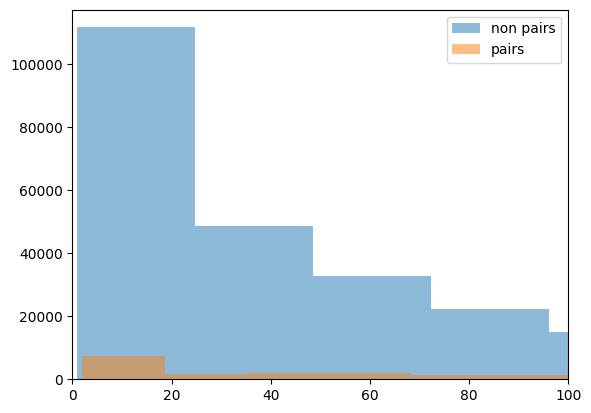

In [33]:
# plot the same but grpah sizes
temp_pairs = [f for f in pairs if f in graph_size]
temp_non_pairs = [f for f in non_pairs if f in graph_size]

length_pairs = [graph_size[f] for f in temp_pairs]
length_non_pairs = [graph_size[f] for f in temp_non_pairs]

plt.hist(length_non_pairs, bins=1000, alpha=0.5, label='non pairs')
plt.hist(length_pairs, bins=1000, alpha=0.5, label='pairs')
plt.xlim(0, 100)
plt.legend()
plt.show()


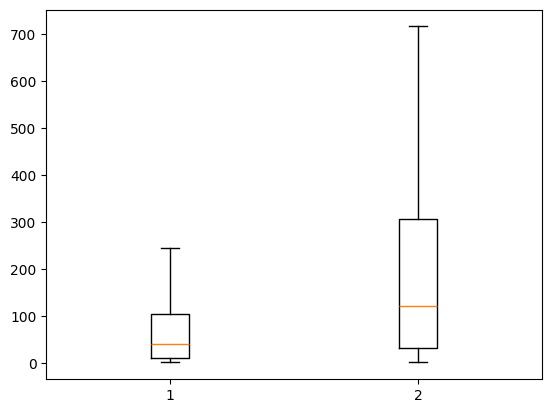

In [36]:
# boxplot hide outliers
plt.boxplot([length_non_pairs, length_pairs], showfliers=False)
plt.show()
